#Outlier Removal

Loading the cleaned data:

In [37]:
import sys
sys.path.append('/Users/alexsutherland/Dropbox/Insight/WeightLossReddit/')
import redditDataIO

In [38]:
cleanedData = redditDataIO.loadData('cleanedWeightLossData')
cleanedData = cleanedData.drop(['level_0','index'], axis=1)
cleanedData.describe()

,num_comments,endWeight,created_utc,height,score,weightChange,over_18,timeElapsed,startWeight,age,currentBMI,previousBMI,timeElapsedEpoch
count,5193.000000,5193.000000,5.193000e+03,5193.000000,5193.000000,5193.000000,5193.000000,5193.000000,5193.000000,5193.000000,5193.000000,5193.000000,5.193000e+03
mean,18.081841,207.965107,1.406196e+09,76.784325,280.295205,-20.962604,0.065280,6.658548,228.927710,24.589832,31.039557,34.219432,3.498565e+07
std,31.269069,1736.101206,1.884940e+07,523.468629,490.290761,1737.570629,0.247043,11.411045,95.459141,7.228421,262.552697,14.682688,9.032808e+07
min,0.000000,1.000000,1.330040e+09,49.000000,0.000000,-2013.000000,0.000000,0.830000,1.000000,12.000000,0.000101,0.000115,6.048000e+05
25%,5.000000,155.000000,1.392270e+09,66.000000,65.000000,-67.000000,0.000000,2.000000,180.000000,21.000000,23.684200,28.095700,1.040000e+07
50%,10.000000,175.000000,1.407790e+09,69.000000,119.000000,-40.000000,0.000000,5.000000,220.000000,24.000000,26.346400,33.101900,2.080000e+07
75%,18.000000,200.000000,1.422920e+09,72.000000,253.000000,-20.000000,0.000000,8.000000,265.000000,27.000000,29.861100,39.232700,3.640000e+07
max,698.000000,125169.000000,1.434480e+09,37772.000000,5569.000000,125061.000000,1.000000,612.000000,2014.000000,289.000000,18929.100000,375.359000,4.410560e+09


Next, we move on to removing outliers for different columns. A common function "removeOutliersByColumn" is defined to accomplish this function:

In [39]:
def removeOutliersByColumn(data, columnName, minValue='', maxValue=''):
    initialRows = data.shape[0]
    print str(minValue) + ' > ' + columnName + ' > ' + str(maxValue) + '...',
    if type(minValue) == int:
        dropIndexes = data[columnName] < minValue
        dropIndexes = dropIndexes[dropIndexes == True].index.map(lambda x: int(x))
    
        #Drop all entries with this excessive weight
        data = data.drop(dropIndexes, axis=0)
    if type(maxValue) == int:
        dropIndexes = data[columnName] > maxValue
        dropIndexes = dropIndexes[dropIndexes == True].index.map(lambda x: int(x))
    
        #Drop all entries with this excessive weight
        data = data.drop(dropIndexes, axis=0)
    print 'Removed ' + str(initialRows - data.shape[0]) + ' outliers from ' + columnName + '. Shape: ' + str(data.shape)
    
    return data

First, let's remove any extreme start weights. Let's make a function that plots the distribution so we can look for outliers:

In [40]:
%matplotlib inline

import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
rcParams['figure.figsize'] = 15,7


def plotDistribution(data, column, binSize = 5):
    plt.hist(data[column].values,bins=np.arange(data[column].min()-5,data[column].max()+5,binSize), facecolor='g', alpha=0.8)
    plt.suptitle('Distribution of ' + column, fontsize=20)
    plt.xlabel(column, fontsize=16)
    plt.ylabel('Count', fontsize=16)

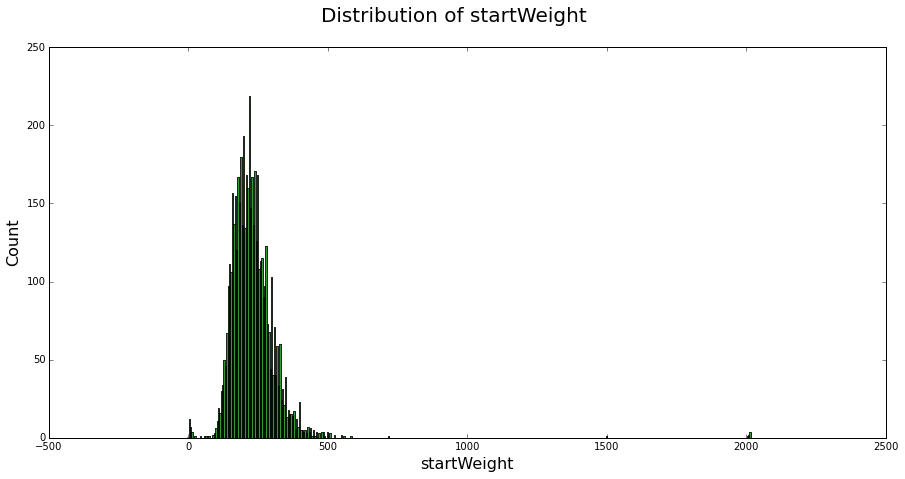

In [41]:
plotDistribution(cleanedData, 'startWeight')

It looks like a fairly normal distribution. There is a slight right skew, which makes sense in this case: It is likely to see large weight outliers in this dataset.

There are also outliers below the curve, as well as a few above the curve. Let's dive deeper into the lower cases first:

In [42]:
cleanedData.ix[cleanedData['startWeight'] < 100,['title','startWeight','weightChange']]

,title,startWeight,weightChange
46,M/22/5'9 - 8 months intense training 5 - 6 day...,9,-1
193,F/16/5'1 [75lbs &gt; 126lbs= 51lbs] (5 years) ...,75,51
569,"M/20/6'7"" [231,5 lbs &gt; 191,8 lbs] (8 months...",5,186
576,F/27/5'5 -30lbs. This is about a year of progr...,5,25
736,F/18/5'2-5'3 [87-110 = +23 lbs] (11 months) ED...,87,23
745,F/26/5'2 - 167 lbs &gt; 122 lbs in 2 years.,2,165
1311,"F/28/5'5 - 63 pounds, 4 pants sizes, 6 MONTHS ...",5,58
1433,"Male/16/5'7"" [98lbs &gt; 120lbs = 22lbs] (1 year)",98,22
1530,"F/19/5'2"" went from 95 pounds to 120 in 2.5 ye...",95,25
1586,M/24/6'5- 417lbs-323lbs (90lbs) In almost a ye...,5,412


The extremely low outliers tended to be incorrectly parsed titles. These can be thrown out by thresholding start weight < 50. 

The others look like they were weight gainers. These can be removed by removing any index with weightChange > 0. 

Before we alter the data, let's look to see what the maximum values should be for startWeight:

In [43]:
cleanedData.ix[cleanedData['startWeight'] > 500,['title','startWeight','weightChange']]

,title,startWeight,weightChange
230,"M/23/6'0"" [506 &gt; 276 = 230] (18 months) Sti...",506,-230
622,M/23/6' [506 &gt; 253lbs = 253lbs] (~1.75 year...,506,-253
1075,"For my cakeday, exactly two years ago, I joine...",2011,2
1393,"M/40/5'10"" [550 &gt;336 = 214 lbs] (14 months)...",550,-214
1505,"M/28/6'7"" [525lbs &gt; 449lbs = 76 Lbs Lost] (...",525,-76
1997,"[F/22/5'10""/156-133=23lbs] About 12-15 weeks o...",1500,-150
2233,"UPDATE M/28/6'7"" [525lbs &gt; 397lbs = 128 Lbs...",525,-128
2318,"M/27/5'6""/157lbs [138lbs 2012-130lbs 2013- 157...",2012,-1882
2415,M/21/5'10 + Grandma Tunisia Holiday Pics (2008...,2008,6
2436,F/27/5'5'' 190lbs-130lbs. Photos were taken fi...,2008,5


All the ones around 500-600 lbs look legit. There's even on at 720 lbs. The problematic ones occur when it grabs the year as the start weight. Let's remove this by filtering anything above 1000 lbs (and also anything less than 50 lbs as we defined before):

50 > startWeight > 1000... Removed 33 outliers from startWeight. Shape: (5160, 22)


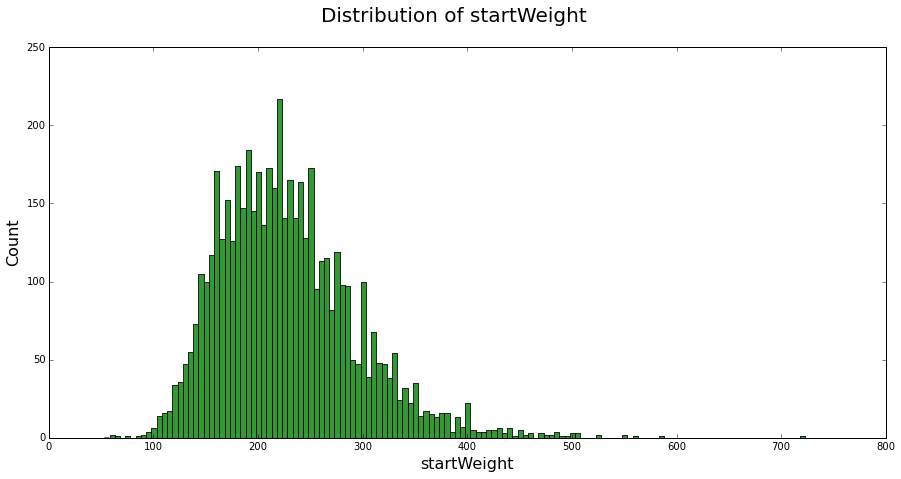

In [44]:
outlierRemovedData = removeOutliersByColumn(cleanedData, 'startWeight', minValue=50, maxValue=1000)
plotDistribution(outlierRemovedData, 'startWeight')

This distribution looks much better than before.

WeightChange had a huge outlier. This previously caused the plotDistribution function to hang for a long time. Let's remove this:

In [45]:
outlierRemovedData = removeOutliersByColumn(outlierRemovedData, 'weightChange', maxValue=1000)

 > weightChange > 1000... Removed 2 outliers from weightChange. Shape: (5158, 22)


Now, let's turn our attention to the weightChange outliers. We know we want to throw out anyone with a weightChange > 0. Let's look more into this distribution:

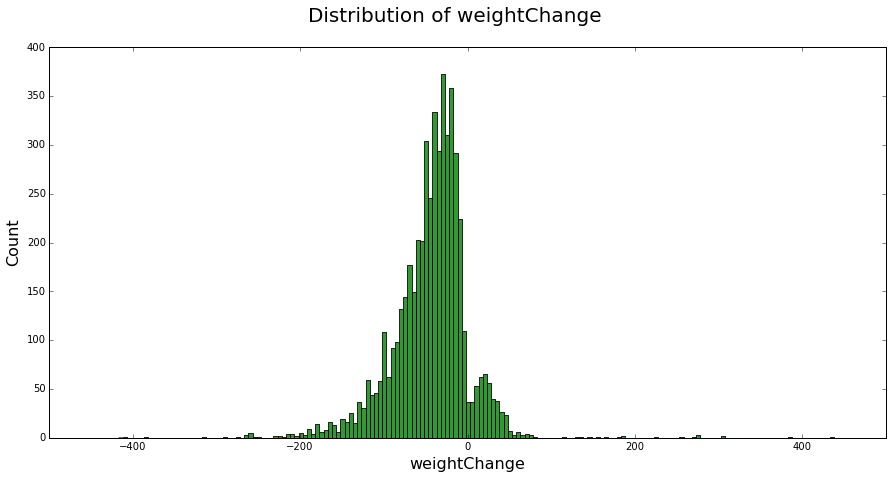

In [46]:
plotDistribution(outlierRemovedData, 'weightChange')

This is a bimodal distribution, with a surprising amount of values near 0. Let's investigate these further:

In [47]:
outlierRemovedData.ix[abs(outlierRemovedData['weightChange']) < 5,['title','startWeight','endWeight','weightChange']]

,title,startWeight,endWeight,weightChange
130,"M/26/5'7"" [180 &gt; 180] (6 months) I basicall...",180.0,180.0,0.0
163,"M/26/5'7"" [152 &gt; 154@12%bf] +2lbs 1month GW...",152.0,154.0,2.0
337,"F/20/5'2"" [150bs &gt; 153lbs = +3lbs] (6 month...",150.0,153.0,3.0
395,M/25/6' [170&gt;170] (12 months) Recovering fr...,170.0,170.0,0.0
587,"F/23/5'5"" [135lbs &gt; 132lbs = 3lbs] (1.5 mon...",135.0,132.0,-3.0
596,"F/25/4'11"" [104 lbs &gt; 102 lbs] (2 weeks) Ke...",104.0,102.0,-2.0
688,"F/21/5'6"" [161 &gt; 161=0lbs] (2 weeks) I just...",161.0,161.0,0.0
694,"M/26/5'6 178 to 178lb. 2 months down, the rest...",178.0,178.0,0.0
816,"M/21/5'7"" [170lbs &gt; 170lbs] (3 year progres...",170.0,170.0,0.0
888,"M/19/5'10""[144&lt;146=+2] (1 month) more of a ...",144.0,146.0,2.0


These all seem legit. Some people post when their weight is only slightly changed. However, we are mostly concerned with people who are trying to actually lose weight, not add muscle. Therefore, let's restrict to weight losses of > 5 lbs. 

In [48]:
outlierRemovedData = removeOutliersByColumn(outlierRemovedData, 'weightChange', maxValue=-5)

 > weightChange > -5... Removed 501 outliers from weightChange. Shape: (4657, 22)


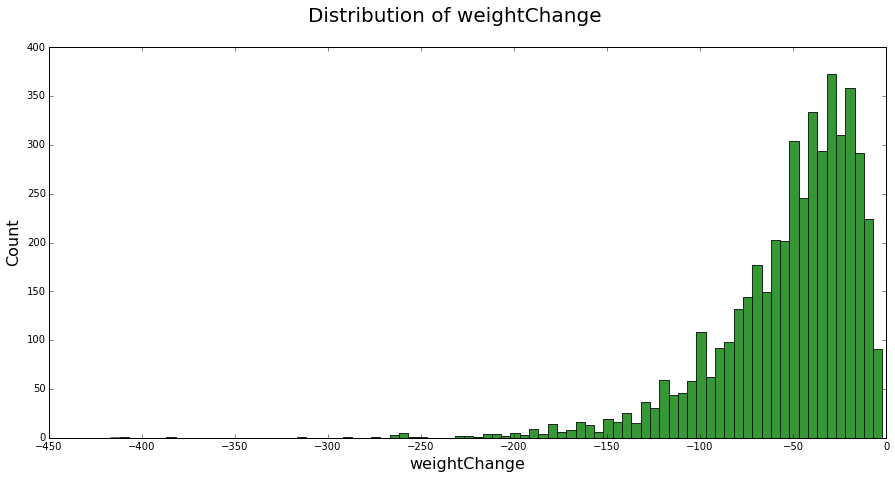

In [49]:
plotDistribution(outlierRemovedData, column='weightChange')

Let's look at the endWeight distribution:

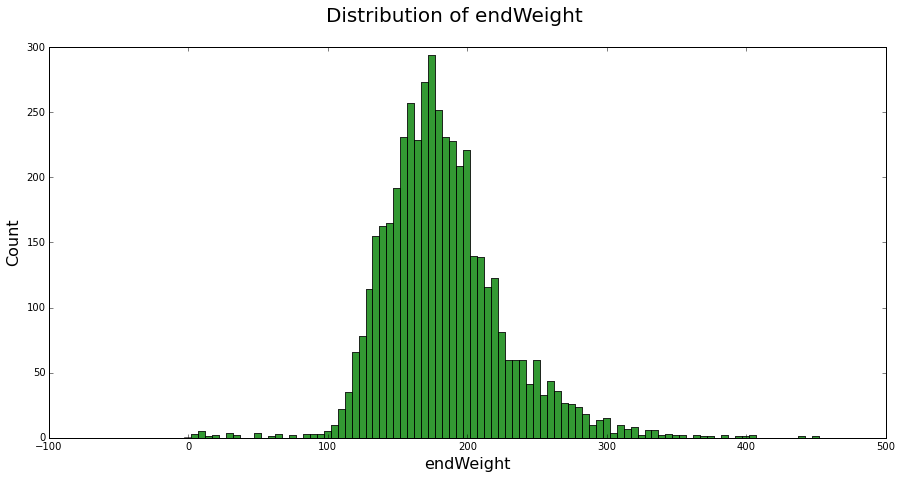

In [50]:
plotDistribution(outlierRemovedData, column='endWeight')

Here, there are no large outliers on the right, however, there are some outliers on the left side. Let's investigate those further:

In [51]:
outlierRemovedData.ix[outlierRemovedData['endWeight'] < 100, ['title','endWeight','weightChange','currentBMI']]

,title,endWeight,weightChange,currentBMI
0,2 Month check in 2011/12/9 272lbs (123.4kg) &g...,8.8,-261.8,0.622837
43,"F/30/5'11"" - 446 vs 277 - 11 months apart",11.0,-266.0,1.571120
84,"M/27/6'0"" (183cm) [139 lbs (63kg) &gt; 171lbs ...",63.0,-76.0,8.750000
95,"M/18/5'11"" [235 &gt; 50 = 185] in 9 months. Th...",50.0,-185.0,7.141440
376,"[M/28/5'10""/180lbs - 2 month progress] No chan...",2.0,-178.0,0.293878
397,F/26/5'2''(160.5cm) [135lbs (61.5kg) &gt; 119 ...,61.0,-74.0,11.425600
450,"M/27/6'0""/170lbs - 7 Weeks in, having trouble ...",7.0,-163.0,0.972222
518,"M/28/6'1"" [107kg/235lbs &gt; 86kg/190lbs = 21k...",86.0,-149.0,11.619400
575,M/32/5'8'' (174cm) [196lbs (89Kg) &gt; 139Lbs ...,89.0,-107.0,13.858100
829,M/20/6' [117kg/258lbs &gt; 86kg/190lbs = 31kg/...,86.0,-172.0,11.944400


The issue with most of these is that they use both kg and lb units in their title. The regex grabbed the kg amount as the end weight. 

Let's see if the BMI can catch these:

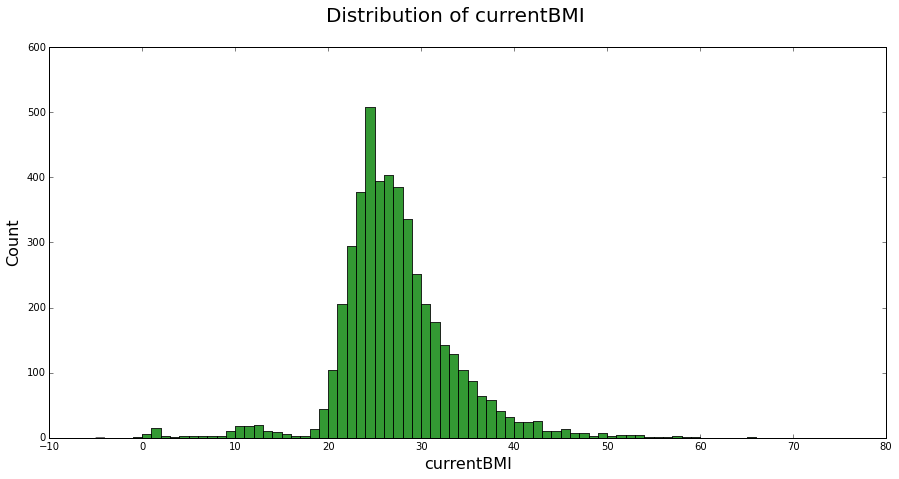

In [52]:
plotDistribution(outlierRemovedData, column='currentBMI', binSize = 1)

It looks like there's a bi (or tri) modal distribution. We only want the large distribution. Let's look at the lower BMIs: 

In [53]:
outlierRemovedData.ix[outlierRemovedData['currentBMI'] < 20, ['title','startWeight','endWeight','weightChange','height','currentBMI']]

,title,startWeight,endWeight,weightChange,height,currentBMI
0,2 Month check in 2011/12/9 272lbs (123.4kg) &g...,270.6,8.8,-261.8,68,0.622837
43,"F/30/5'11"" - 446 vs 277 - 11 months apart",277.0,11.0,-266.0,71,1.571120
77,M/27/5'11 [94.6kg-89.4kg = 5.2kg] completed a ...,206.8,195.8,-11.0,71,12.711800
84,"M/27/6'0"" (183cm) [139 lbs (63kg) &gt; 171lbs ...",139.0,63.0,-76.0,72,8.750000
93,"M/30/6'0"" [125kg &gt; 105kg = 20kg] (4 months)...",275.0,231.0,-44.0,72,14.583300
95,"M/18/5'11"" [235 &gt; 50 = 185] in 9 months. Th...",235.0,50.0,-185.0,71,7.141440
167,"F/27/5'10"" [145lbs &gt; 127lbs = 18lbs] from t...",145.0,127.0,-18.0,70,18.661200
264,"M/30/6'0"" [125kg &gt; 98kg = 27kg] (5 months) ...",275.0,215.6,-59.4,72,13.611100
271,"F/24/5'6"" [160&gt;120lbs=40 lbs] The last 20 t...",160.0,120.0,-40.0,66,19.834700
314,"M/22/5'9"" [106kg &gt; 83kg = 23kg/50lbs] 6 mon...",233.2,182.6,-50.6,69,12.552000


It looks like there are some people where it's grabbing the kg weight for the endWeight, leading to a low BMI. For others, it's calculating the wrong height. 

Let's look at the height distribution closer:

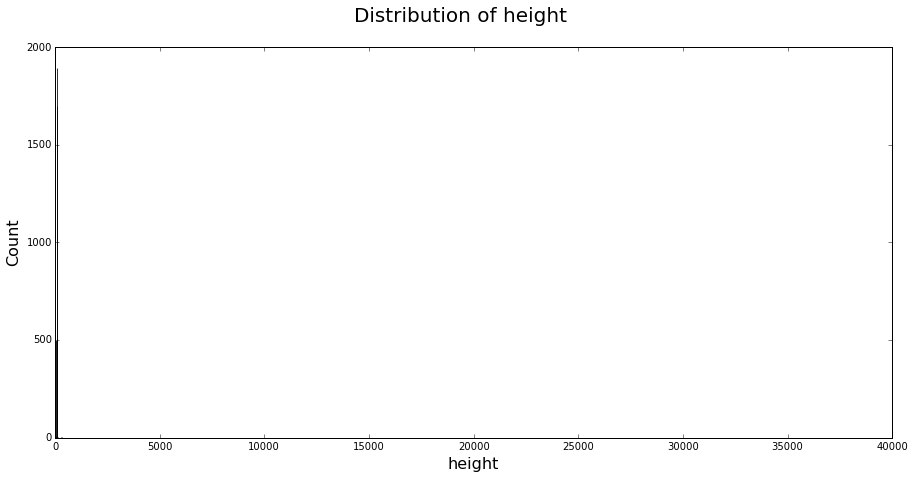

In [54]:
plotDistribution(outlierRemovedData, column='height')

This is not a readable distribution. Let's look at the height range:

In [55]:
outlierRemovedData['height'].describe()

count     4657.000000
mean        77.534250
std        552.767268
min         49.000000
25%         66.000000
50%         69.000000
75%         72.000000
max      37772.000000
dtype: float64

There is a large outlier. Let's filter this:

In [56]:
outlierRemovedData = removeOutliersByColumn(outlierRemovedData, 'height', maxValue=1000)

 > height > 1000... Removed 1 outliers from height. Shape: (4656, 22)


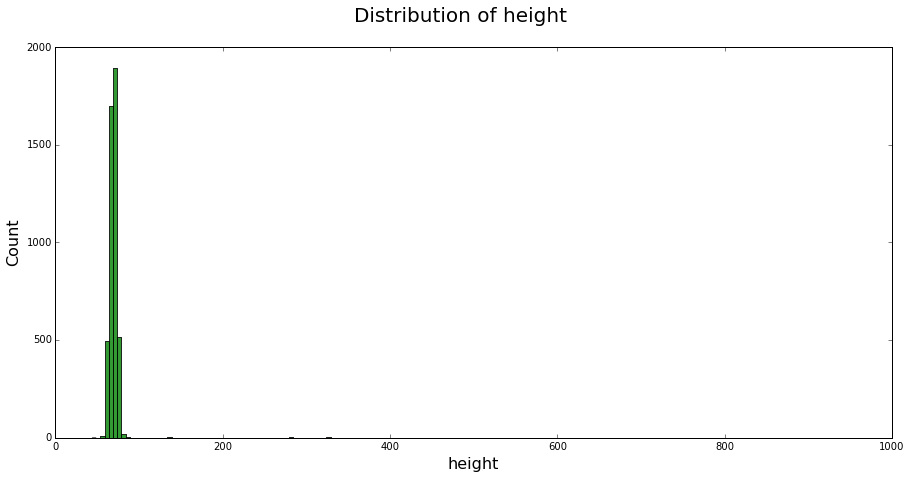

In [57]:
plotDistribution(outlierRemovedData, column='height')

There are still some big outliers > 100 inches

In [58]:
outlierRemovedData = removeOutliersByColumn(outlierRemovedData, 'height', maxValue=100)

 > height > 100... Removed 15 outliers from height. Shape: (4641, 22)


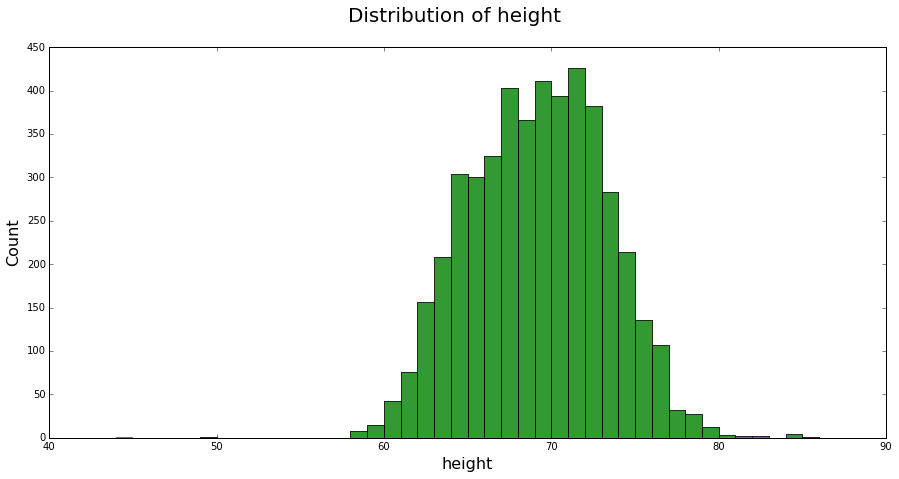

In [59]:
plotDistribution(outlierRemovedData, column='height', binSize = 1)

This is looking better, but there are still some outliers on the high and low side. Let's create a stricter filter:

In [60]:
#54" is 4'6
#84 inches is 7'
outlierRemovedData = removeOutliersByColumn(outlierRemovedData, 'height', minValue=54, maxValue=84)

54 > height > 84... Removed 2 outliers from height. Shape: (4639, 22)


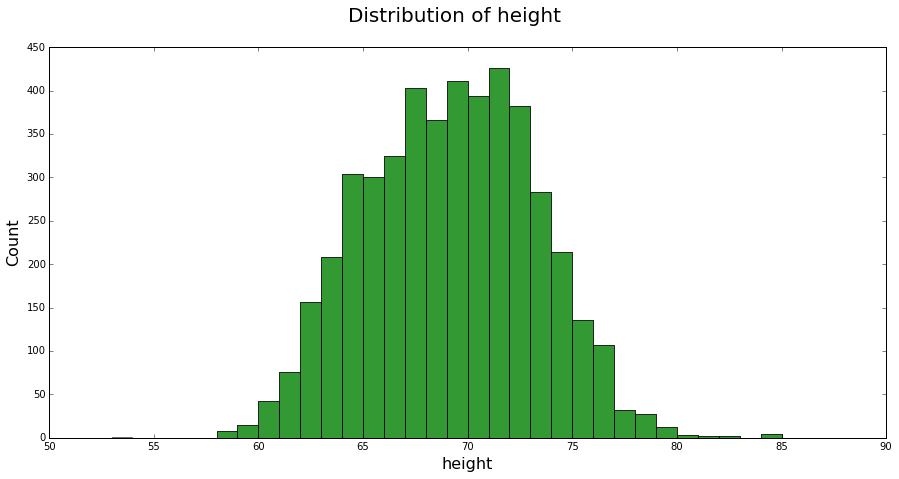

In [61]:
plotDistribution(outlierRemovedData, column='height', binSize=1)

Let's look back at the current BMI value:

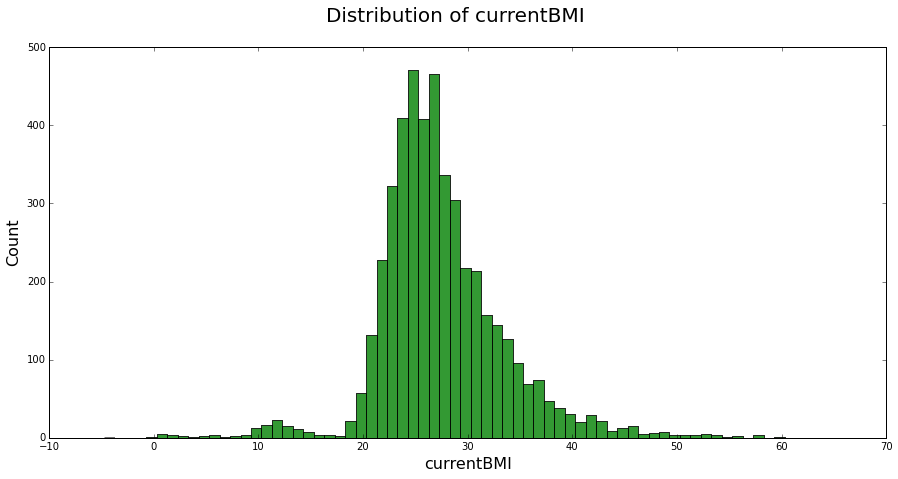

In [62]:
plotDistribution(outlierRemovedData, column='currentBMI', binSize = 1)

There are less extremely low outliers, let's just filter out the BMIs < 17

In [63]:
outlierRemovedData = removeOutliersByColumn(outlierRemovedData, columnName='currentBMI', minValue=17)

17 > currentBMI > ... Removed 116 outliers from currentBMI. Shape: (4523, 22)


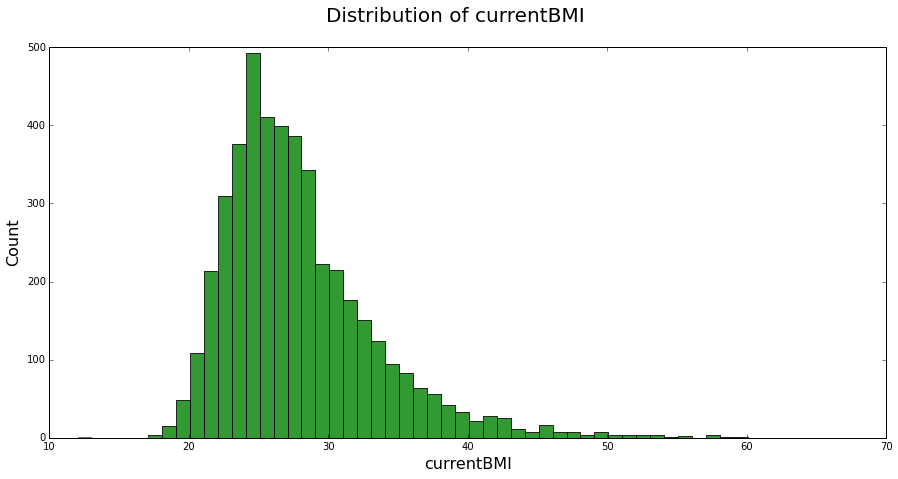

In [64]:
plotDistribution(outlierRemovedData, column='currentBMI', binSize = 1)

This looks much better. The BMIs are all within range:

Let's look at the distribution of the startBMIs

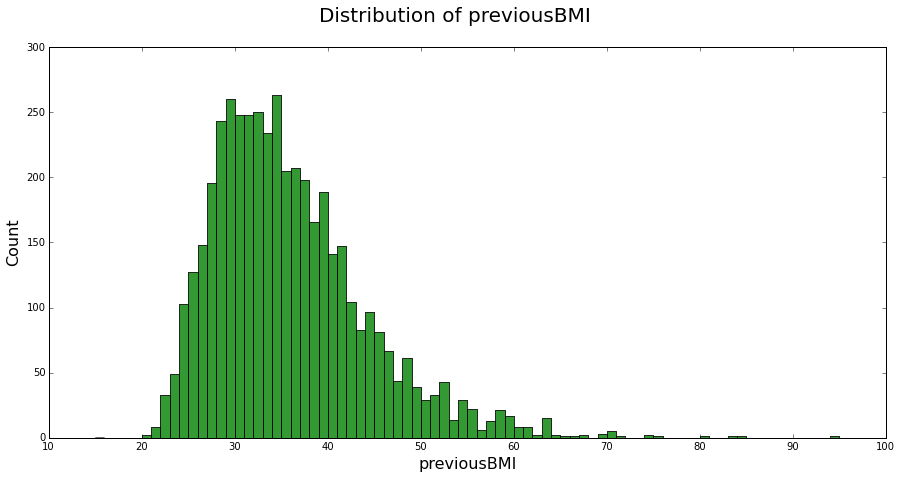

In [65]:
plotDistribution(outlierRemovedData, column='previousBMI', binSize = 1)

The previous BMI distribution looks good. 

We've looked at startWeight, endWeight, weightChange, and BMIs. Let's look at weight change rate:

In [66]:
outlierRemovedData['timeElapsedMonths'] = outlierRemovedData['timeElapsedEpoch'] / (60*60*24*30)

outlierRemovedData['weightChangeRate'] = outlierRemovedData['weightChange'] / outlierRemovedData['timeElapsedMonths']

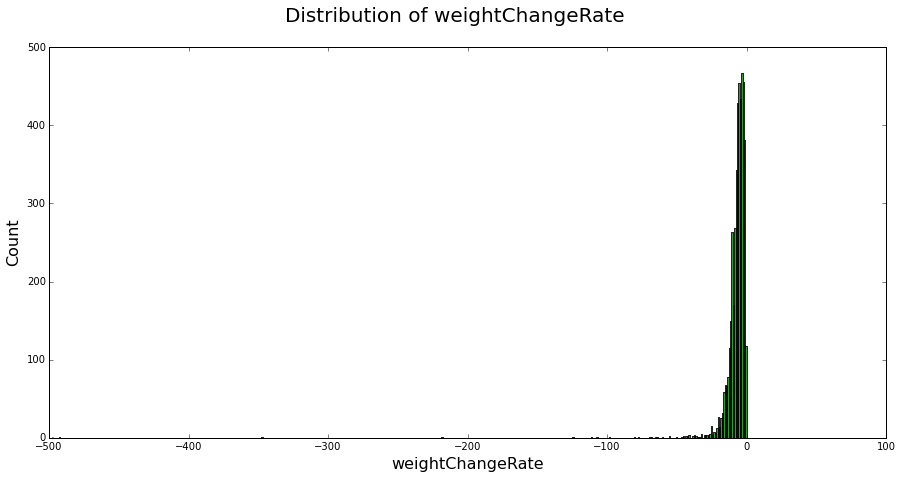

In [67]:
plotDistribution(outlierRemovedData, column='weightChangeRate', binSize = 1)

There are significantly outliers, where people lost more than 200 lbs per month

In [68]:
import qgrid
qgrid.show_grid(outlierRemovedData.ix[outlierRemovedData['weightChangeRate'] < -40,['title','weightChangeRate','weightChange','timeElapsedMonths']])

Most of these look pretty extreme. Either crash diets or cleanses. Let's set a limit of 50 lbs per month:

In [70]:
outlierRemovedData = removeOutliersByColumn(outlierRemovedData, columnName='weightChangeRate', minValue=-50)

-40 > weightChangeRate > ... Removed 27 outliers from weightChangeRate. Shape: (4496, 24)


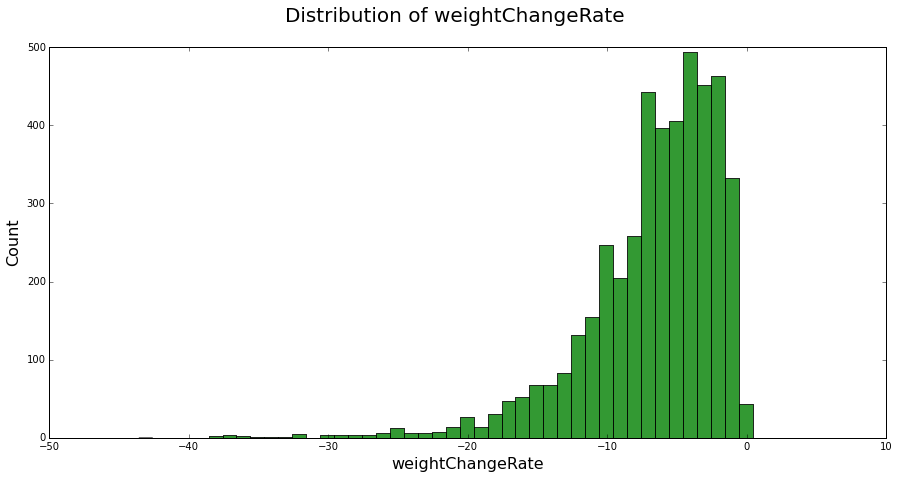

In [71]:
plotDistribution(outlierRemovedData, column='weightChangeRate', binSize = 1)

Let's keep going here and cut out all of the outliers < -30

In [72]:
outlierRemovedData = removeOutliersByColumn(outlierRemovedData, columnName='weightChangeRate', minValue=-30)

-30 > weightChangeRate > ... Removed 15 outliers from weightChangeRate. Shape: (4481, 24)


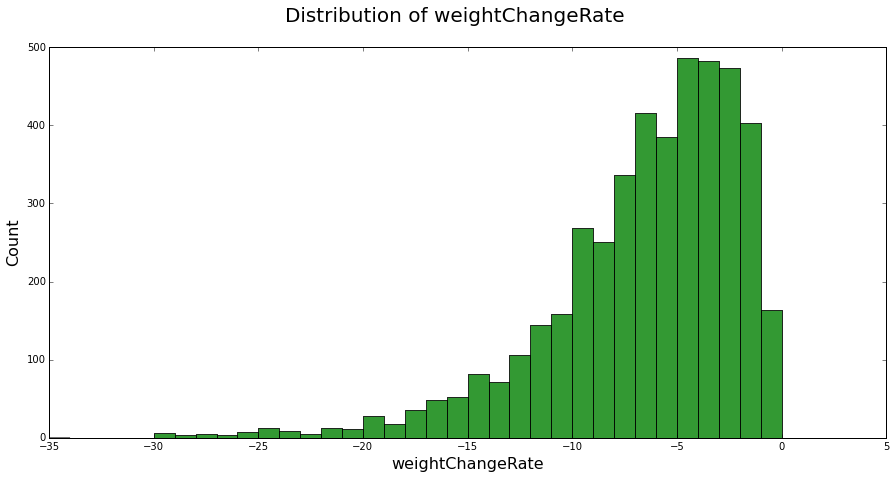

In [73]:
plotDistribution(outlierRemovedData, column='weightChangeRate', binSize = 1)

This is looking kosher.

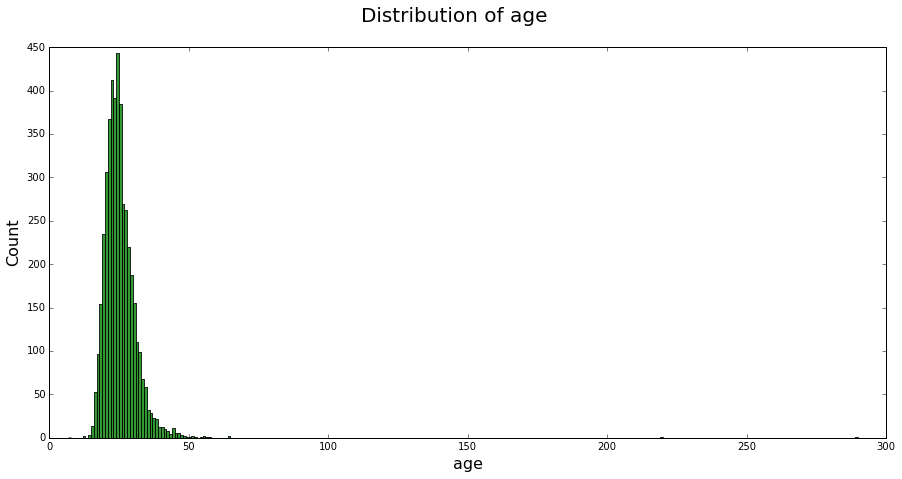

In [74]:
plotDistribution(outlierRemovedData, column='age', binSize = 1)

In [75]:
outlierRemovedData = removeOutliersByColumn(outlierRemovedData, columnName='age', maxValue=100)

 > age > 100... Removed 2 outliers from age. Shape: (4479, 24)


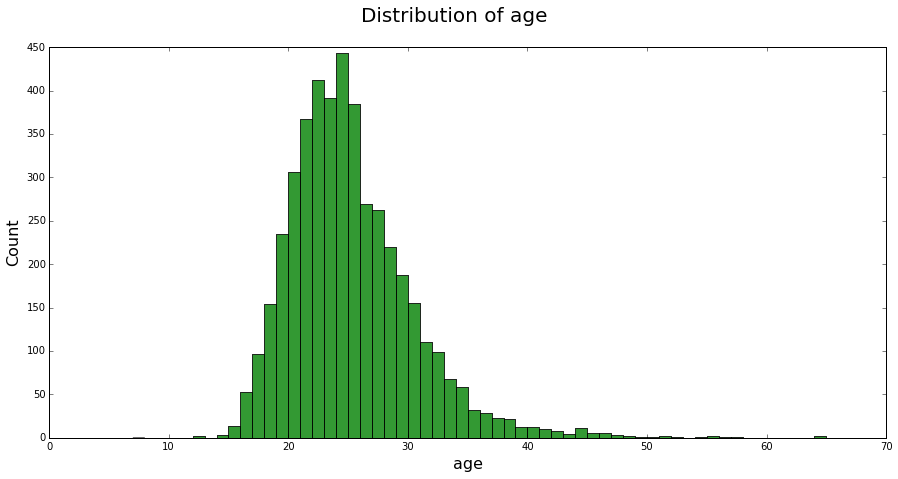

In [76]:
plotDistribution(outlierRemovedData, column='age', binSize = 1)

In [83]:
qgrid.show_grid(outlierRemovedData.ix[outlierRemovedData['age'] > 50,['title','age','startWeight','endWeight','created_utc']])

These are all legit.

In [84]:
redditDataIO.exportDataToSQL(outlierRemovedData, 'outlierRemovedWeightLossData')

Index([u'permalink', u'userText', u'name', u'author', u'url', u'num_comments', u'endWeight', u'title', u'created_utc', u'height', u'weightUnit', u'score', u'weightChange', u'over_18', u'timeElapsed', u'gender', u'timeUnit', u'startWeight', u'age', u'currentBMI', u'previousBMI', u'timeElapsedEpoch', u'timeElapsedMonths', u'weightChangeRate'], dtype='object')
Exported Data to SQL Table (Name: outlierRemovedWeightLossData)


/Users/alexsutherland/anaconda/lib/python2.7/site-packages/pymysql/cursors.py:134: Warning: Unknown table 'redditweightdatabase.outlierremovedweightlossdata'
  result = self._query(query)
